# Main Notebook 

import tensorflow as tf
from Functions import *
import pyautogui 
import matplotlib.pyplot as plt
import itertools

The dataset we are going to use is 35,000 grayscale images in a csv of two columns where one column is an array of pixels and the other is a number from 0-6 representing the 7 different classes so I am going to have to read in the csv, make a list of the right emotions to map onto each class and split it into the X(pixels) and Y(classes) then do a train test split. I also made another dataframe where I replaced the emotion class with the actual label in hopes of being able to pick specific cases for vizualizing misclassifications.

In [1]:
# loadi
from Functions import *
filename = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('fer2013.csv',names=names)
im=df['pixels']
df.head(10)
imbalancedf = df[df['emotion']!='emotion']
im=imbalancedf.emotion.apply(lambda x: ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][int(x)])
labeleddf = pd.DataFrame()
labeleddf['pixels']=df['pixels']




In [2]:
labeleddf['emotion'] = im

In [3]:
labeleddf = labeleddf.iloc[1:]

In [4]:
labeleddf.head(15)

,pixels,emotion
1,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Anger
2,151 150 147 155 148 133 111 140 170 174 182 15...,Anger
3,231 212 156 164 174 138 161 173 182 200 106 38...,Fear
4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Sad
5,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Neutral
6,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Fear
7,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Sad
8,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Happy
9,85 84 90 121 101 102 133 153 153 169 177 189 1...,Happy
10,255 254 255 254 254 179 122 107 95 124 149 150...,Fear


In [5]:
def picfromdf(df,index):
    ''' takes in the image dataframe and and an boservations index location 
    and parses the pixel string and returns the 48,48 image that that string was meant to convey,
    also displays the image '''
    arr = df['pixels'].iloc[index]
    arr = arr.split(' ')
    ans = []
    for i in arr:
        ans.append(int(i))
    plt.matshow(np.array(ans).reshape(48,48),cmap='gray')
    plt.title(df['emotion'].iloc[index])
    return np.array(ans).reshape(48,48)
def genpicdict(df):
    '''To be able to get examples of each picture I made a function that 
    takes in the dataframe and parses it for a picture in 
    each of the classes then it returns a dictionary of those pictures'''
    picdict = {}
    for i in ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']:
        if i not in picdict:
            picdict[i] = picfromdf(df[df['emotion'] == i],1)
    return picdict
def modelpredictonpicdict(picdict,model):
    '''Takes in a dictionary of unique pics made from the genpicdict 
    fucntion and takes a cnn model then predicts on every single pic in the dict printing the answer'''
    picpixels = []
    for i in picdict.keys():
        picpixels.append(picdict[i])
    picpixels = np.array(picpixels)
    picpixels = picpixels.reshape(len(picdict.keys()),48,48,1)
    predictions = model.predict(picpixels)
    ans = []
    for a in predictions:
        ans.append(['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'][int(a.argmax())])
    print(ans)
def makeexplanaitionmodel(model):
    '''one of the teqniques to visualize convulution layers is to make a model that just outputs at each layer'''
    layer_outputs = [layer.output for layer in model.layers[:9]] 
    activation_model = tf.keras.Model(inputs=model.input, outputs=layer_outputs)
    return activation_model

def explanationpic(picdict):
    '''takes in the picdict generated before and 
    returns to original class the predicted class and displays different activations for both'''
    picpixels = []
    picid = []
    origpic = []
    for i in picdict.keys():
        origpic.append(picdict[i])
        picid.append(i)
        picpixels.append(picdict[i])
    picpixels = np.array(picpixels)
    picpixels = picpixels.reshape(len(picdict.keys()),48,48,1)
    predictions = emodel.predict(picpixels)
    print(predictions.shape)
    for i in predictions[0]:
        plt.matshow(i.reshape(-1,9,48,48,1),cmap='gray')
        plt.title(i)
    return picid,origpic,predictions

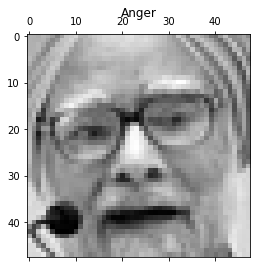

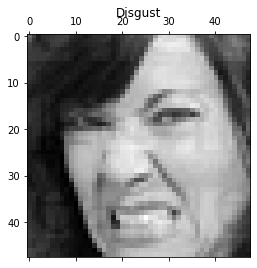

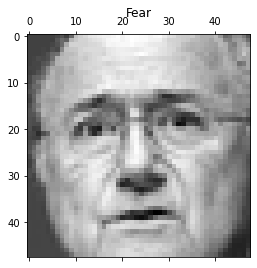

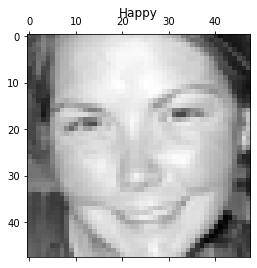

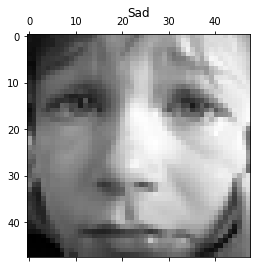

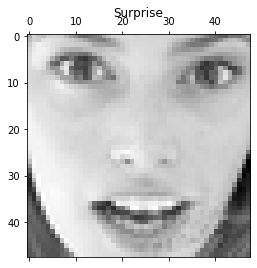

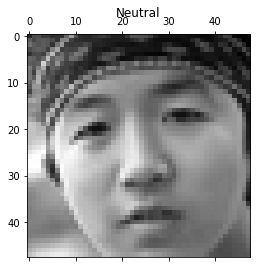

In [6]:
picdict = genpicdict(labeleddf)
pkl.dump(picdict,open('picdict.pkl','wb'))

In [39]:
#Initially I had a function in Functions.py that would just load the model but that started giving me an eager tensor error
model = Sequential()
input_shape = (48,48,1)
model.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(128, (5, 5), input_shape=input_shape,activation='relu', padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(1024, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(BatchNormalization())


model.add(Dense(999))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(750))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(BatchNormalization())


model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
model.load_weights('FinalModel')
modelpredictonpicdict(picdict,model)


['Disgust', 'Disgust', 'Surprise', 'Neutral', 'Happy', 'Disgust', 'Anger']


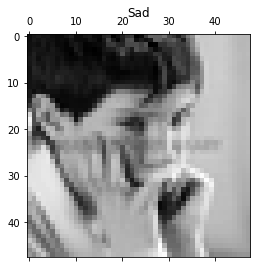

In [9]:
x = picfromdf(labeleddf,3)


In [10]:
emodel = makeexplanaitionmodel(model)


Text(0.5, 1.0, 'Class imbalance')

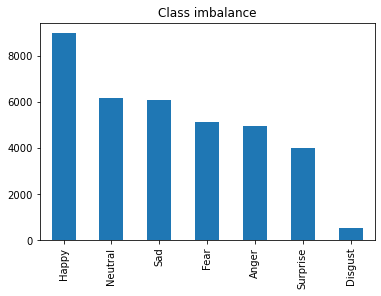

In [11]:
im.value_counts().plot.bar()
plt.title('Class imbalance')


In [12]:
im.value_counts()

Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Anger       4953
Surprise    4002
Disgust      547
Name: emotion, dtype: int64

In [13]:
#split the dataframe into the x and y so we can do a train test split
X, Y = getData(filename)
num_class = len(set(Y))
print(num_class)

7


In [54]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)
cascade = load_cascade_classifier_xml()
print(X.shape)

ValueError: too many values to unpack (expected 2)

In [15]:
#Train test split and one hot encoding the y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [16]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [17]:
y_pred=model.predict(X_test)
y_test.shape


(3589, 7)

In [18]:
#the making preds for confusion matrices 
ly_pred = []
for i in y_pred:
    ly_pred.append(i.argmax())
ly_test = []
for i in y_test:
    ly_test.append(i.argmax())

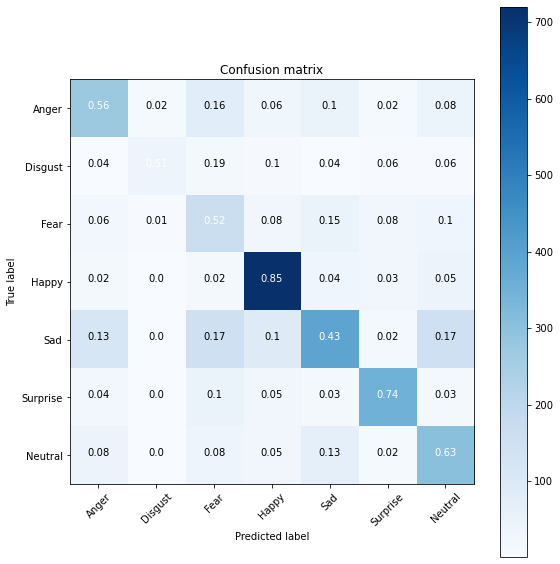

In [18]:

#making the confustion matrix to then pipe into the plot_confustion_matrix function that I got from 
#https://towardsdatascience.com/exploring-confusion-matrix-evolution-on-tensorboard-e66b39f4ac12
cm = tf.math.confusion_matrix(ly_pred,ly_test)
def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.
    
    Args:
       cm (array, shape = [n, n]): a confusion matrix of integer classes
       class_names (array, shape = [n]): String names of the integer classes
    """
    cm = np.array(cm)
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure
cm =plot_confusion_matrix(cm,label_map)

# Loading in the cmu pose estimation model

In [19]:
#Everytime i mess with anyting in this block it breaks
import sys
from time import time
import logging
import numpy as np
import cv2

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh



def str2bool(v):
    return v.lower() in ("yes", "true", "t", "1")
camera = 0
resize = '432x368'     # resize images before they are processed
resize_out_ratio = 4.0 # resize heatmaps before they are post-processed
mod = 'mobilenet_thin'
#tf-pose is a library built around cmu
show_process = False
tensorrt = False       # for tensorrt process
# logger.debug('initialization %s : %s' % (args.model, get_graph_path(args.model)))
w, h = model_wh(resize)

e = TfPoseEstimator(get_graph_path(mod), target_size=(432, 368), trt_bool=False)
# humans = e.inference(image,
#                          resize_to_default=(w > 0 and h > 0),
#                          upsample_size=resize_out_ratio)

#     #logger.debug('postprocess+')
#     image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
from IPython.display import clear_output
clear_output()

# Deep Dream Visualization Functions

In [25]:
def deprocess(img):
    '''preps image to be handled by most of the deep dream functions by converting it to a float32 tensor'''
    return tf.cast(img, tf.float32)
# Display an image
def show(img):
    """takes an image matrix and displays it"""
    display.display(PIL.Image.fromarray(np.array(tf.cast(img, tf.uint8))))
# Create the feature extraction model
    
def calc_loss(img, model):
    '''deep dream images are generated by gradient ascent meaning we need to be able to calculate the loss function'''
  # Pass forward the image through the model to retrieve the activations.
  # Converts the image into a batch of size 1.
    img_batch = tf.expand_dims(img, axis=0)
    layer_activations = model(img_batch)
    if len(layer_activations) == 1:
        layer_activations = [layer_activations]

    losses = []
    for act in layer_activations:
        loss = tf.math.reduce_mean(act)
        losses.append(loss)

    return  tf.reduce_sum(losses)
class DeepDream(tf.Module):
    '''deep dream model class to use to generate conceptualization pics'''
    def __init__(self, model):
        self.model = model

#     @tf.function(
#         input_signature=(
#         tf.TensorSpec(shape=[None,None,3], dtype=tf.float32),
#         tf.TensorSpec(shape=[], dtype=tf.int32),
#         tf.TensorSpec(shape=[], dtype=tf.float32),))
    def __call__(self, img, steps, step_size):
        print("Tracing")
        loss = tf.constant(0.0)
        for n in tf.range(steps):
            with tf.GradientTape() as tape:
                # This needs gradients relative to `img`
          # `GradientTape` only watches `tf.Variable`s by default
                tape.watch(img)
                loss = calc_loss(img, self.model)

        # Calculate the gradient of the loss with respect to the pixels of the input image.
                gradients = tape.gradient(loss, img)

        # Normalize the gradients.
                gradients /= tf.math.reduce_std(gradients) + 1e-8 
        
        # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
        # You can update the image by directly adding the gradients (because they're the same shape!)
                img = img + gradients*step_size
#                 img = tf.clip_by_value(img, -1, 1)

        return loss, img
def run_deep_dream_simple(img, steps=100, step_size=0.01):
    '''use the deep dream class to exacterbate activation inducing pictures in our model from the given picture '''
      # Convert from uint8 to the range expected by the model.
    img = tf.convert_to_tensor(img)
    step_size = tf.convert_to_tensor(step_size)
    steps_remaining = steps
    step = 0
    while steps_remaining:
        if steps_remaining>100:
            run_steps = tf.constant(100)
        else:
            run_steps = tf.constant(steps_remaining)
        steps_remaining -= run_steps
        step += run_steps
    
        loss, img = deepdream(img, run_steps, tf.constant(step_size))
    
        display.clear_output(wait=True)
        show(img)
        print ("Step {}, loss {}".format(step, loss))


        result = img
        display.clear_output(wait=True)
        show(result)

    return result
def generatedeepdreamimg(imagebatch,model,imageposinbatch):
    '''mass generate deepdream pics so I dont have to wait and watch it 30 times'''
    base_model = model

    names = [name.name for name in  base_model.layers]
    layers = [base_model.get_layer(name).output for name in names[:]]

# Create the feature extraction model
    dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

    original_img = np.array(imagebatch)
    original_img = original_img[imageposinbatch]
    original_img = ((original_img)).astype(np.float32)
    dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

# show(deprocess(original_img))
    deepdream = DeepDream(dream_model)
    dream_img = run_deep_dream_simple(img=original_img, 
                                  steps=1000, step_size=0.5)
    return dream_img

In [56]:
base_model = model

names = [name.name for name in  base_model.layers]
layers = [base_model.get_layer(name).output for name in names[:]]

# Create the feature extraction model
dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)
coords,faces,faceframe = find_faces_in_img(baseframe,cascade)
face = faceframe[0]
frame = prep_image(face)
pickedpic= frame

deepdream = DeepDream(model)
dream_img = run_deep_dream_simple(img=frame, 
                                   steps=1000, step_size=0.5)


Tracing


UnimplementedError: The Conv2D op currently does not support grouped convolutions on the CPU. A grouped convolution was attempted to be run because the input depth of 48 does not match the filter input depth of 1 [Op:Conv2D]

In [57]:
names

['conv2d_12',
 'conv2d_13',
 'conv2d_14',
 'max_pooling2d_6',
 'conv2d_15',
 'conv2d_16',
 'max_pooling2d_7',
 'conv2d_17',
 'batch_normalization_12',
 'max_pooling2d_8',
 'flatten_2',
 'batch_normalization_13',
 'dense_12',
 'activation_12',
 'dropout_10',
 'batch_normalization_14',
 'dense_13',
 'activation_13',
 'dropout_11',
 'batch_normalization_15',
 'dense_14',
 'activation_14',
 'dropout_12',
 'batch_normalization_16',
 'dense_15',
 'activation_15',
 'dropout_13',
 'batch_normalization_17',
 'dense_16',
 'activation_16',
 'dropout_14',
 'dense_17',
 'activation_17']

In [58]:
# tf.executing_eagerly(),tf.compat.v1.enable_eager_execution()
def predict_emotion(preppedfaceimg,model):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    custom = model.predict(preppedfaceimg)
    m=0.000000000000000000001
    a=custom[0]
    for i in range(0,len(a)):
        if a[i]>m:
            m=a[i]
            ind=i
    return objects[ind]

In [67]:


cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")
sfps = 0
  
fps = 0
pics = []
showfps=1
predicting = -1
pose = -1
tips = 1
showscreen = -1
while True:
    if showscreen == 1:
        if cap.isOpened():
            cap.release()
        img = pyautogui.screenshot()
        frame = np.array(img)[900:,:1000]
        baseframe = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    if showscreen == -1:
        if not cap.isOpened():
            cap = cv2.VideoCapture(0)
        ret, frame = cap.read()
        baseframe = frame
    

    #logger.debug('postprocess+')
    
    coords,faces,faceframe = find_faces_in_img(baseframe,cascade)
    if predicting == 1:
        for i in range(0,len(faces)):
            face = faces[i]
            frame = prep_image(face)

            prediction = predict_emotion(frame,model)

            text = 'Prediction = '+str(prediction)
            maketextaboveface(baseframe,text,(coords[i][2],coords[i][0]))
    if pose ==1:      
        humans = e.inference(baseframe,
                             resize_to_default=(w > 0 and h > 0),
                             upsample_size=resize_out_ratio)
        image = TfPoseEstimator.draw_humans(baseframe, humans, imgcopy=False)
    fps=time()
    FPS=1/(fps-sfps)
    sfps = fps
    FPS = 'FPS:'+str(round(FPS,ndigits=3))+' & We Found '+str(len(faces))+ ' Face(s)!'
    if showfps == 1:
        maketextaboveface(baseframe,FPS,(10,70))
    if tips == 1:
        maketextaboveface(baseframe,'press p to predict emotion on detected faces',(10,140))
        maketextaboveface(baseframe,'press e to detect poses',(10,210))
        maketextaboveface(baseframe,'press SPACE to save face',(10,280))
        maketextaboveface(baseframe,'press ESC to exit, i to toggle tips, and f to toggle fps',(10,350))
    cv2.imshow('feed', baseframe)
    
    c = cv2.waitKey(50)
    if c == 32:
        coords,faces,faceframe = find_faces_in_img(baseframe,cascade)

        for i in range(0,len(faces)):
            
            face = faces[i]
            frame = prep_image(face)

            prediction = predict_emotion(frame,model)

            text = 'Prediction = '+str(prediction)
            maketextaboveface(baseframe,text,(coords[i][2],coords[i][0]))
            cv2.imshow(f'face{i}', face)
            pics.append(face)
    if c == 112:
        predicting*=-1
    if c == 102:
        showfps*=-1
    if c == 105:
        tips*=-1
    if c == 101:
        pose*=-1
    if c == 97:
        showscreen*=-1
    if c == 27:
        break
cv2.destroyAllWindows()
cap.release()


In [68]:
myface = prep_image(face)

In [69]:
import pickle as pkl
pkl.dump(myface,open('myface.pkl','wb'))

conv2d_12_input (1, 48, 48, 1) 


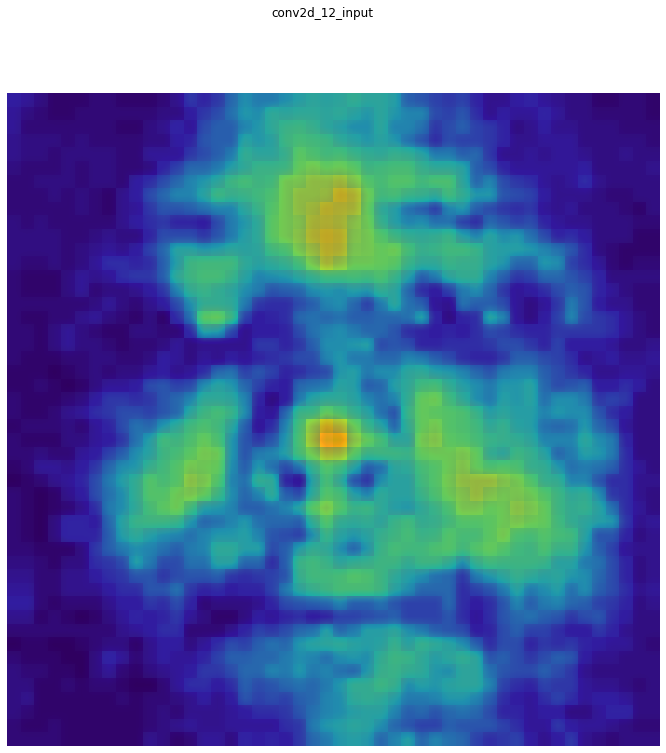

conv2d_12 (1, 48, 48, 128) 


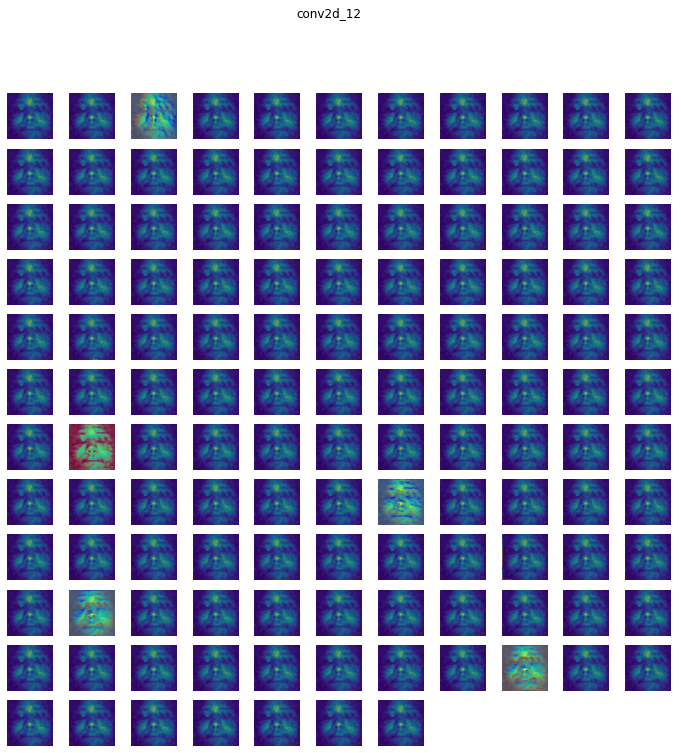

conv2d_13 (1, 48, 48, 128) 


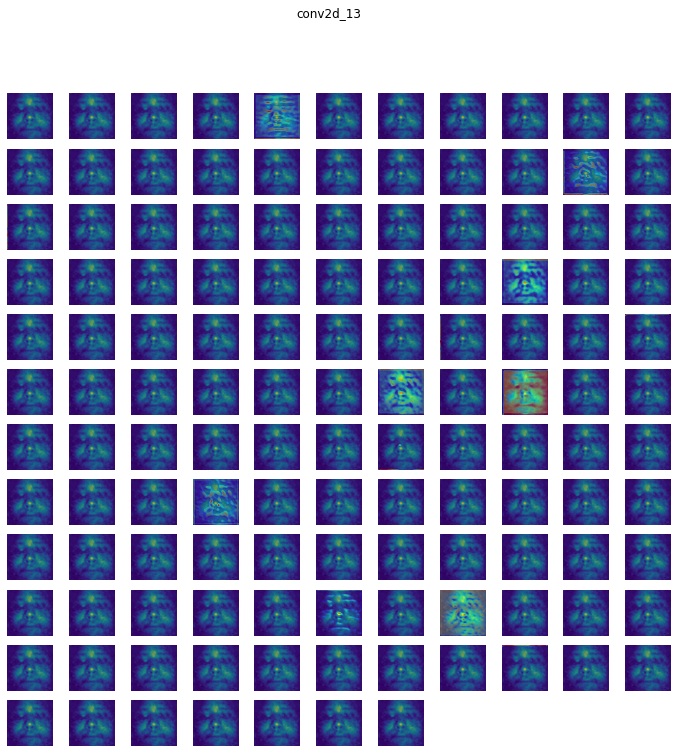

conv2d_14 (1, 48, 48, 128) 


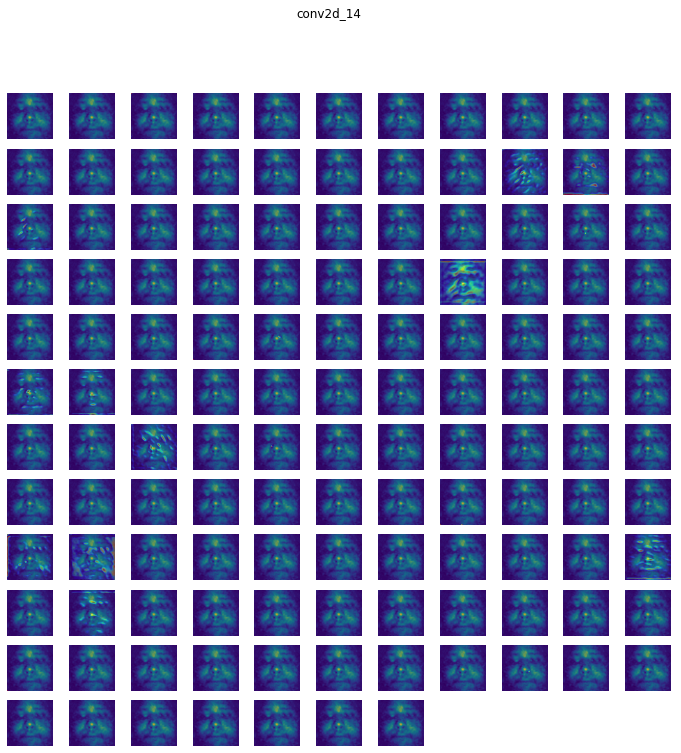

max_pooling2d_6 (1, 24, 24, 128) 


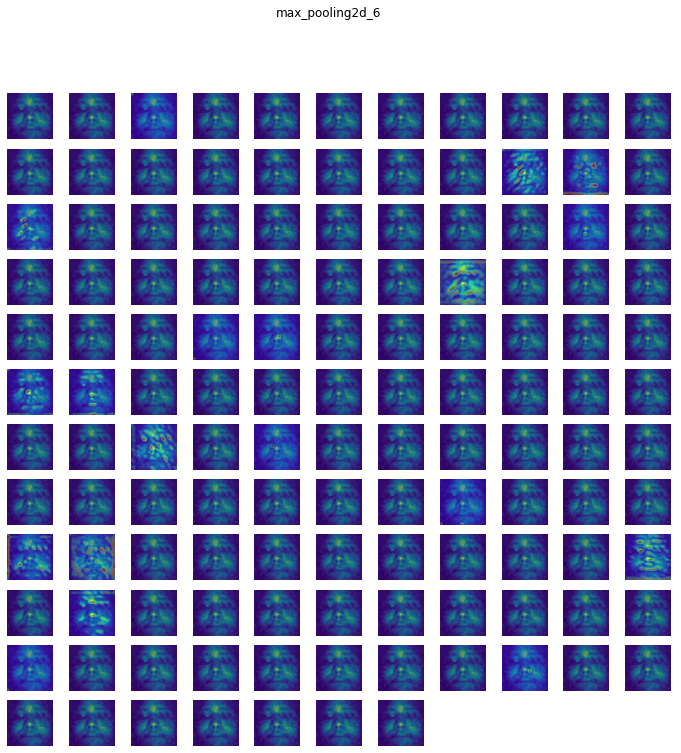

conv2d_15 (1, 24, 24, 256) 


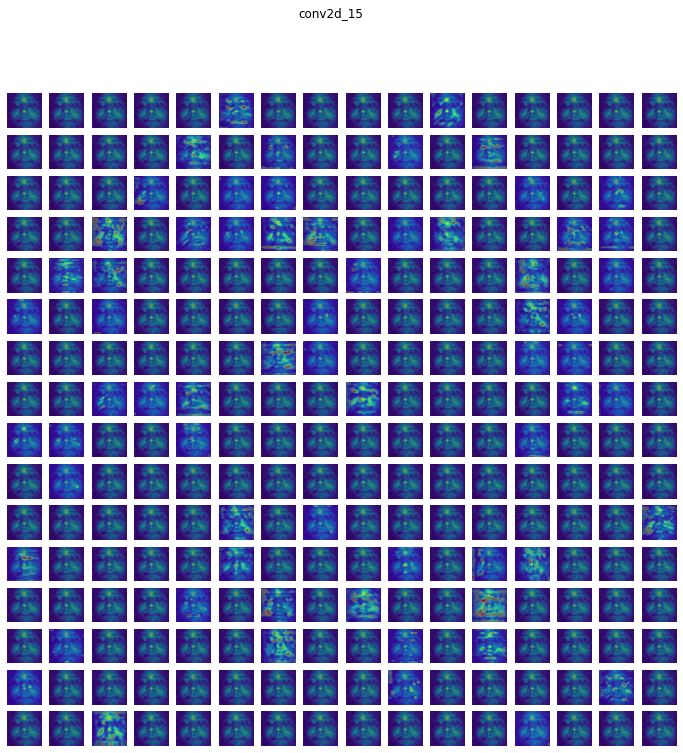

conv2d_16 (1, 24, 24, 256) 


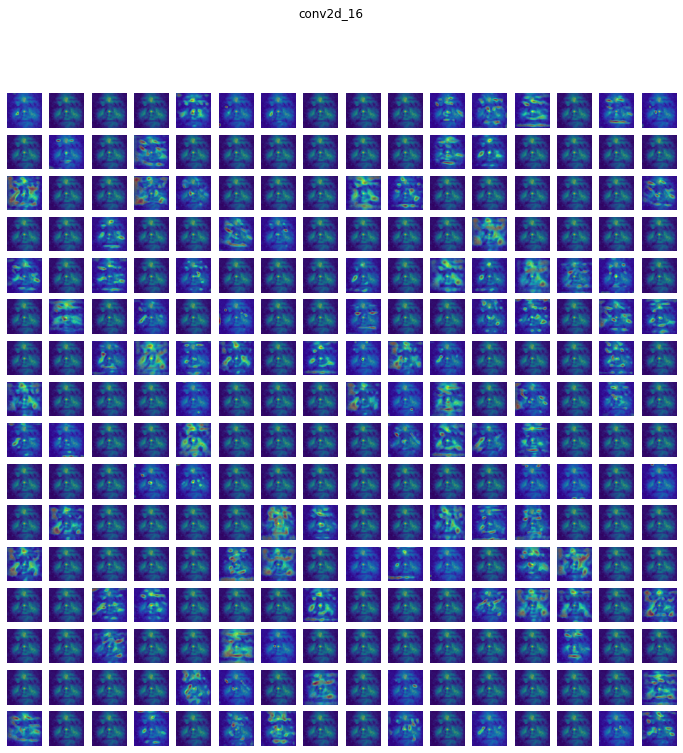

max_pooling2d_7 (1, 12, 12, 256) 


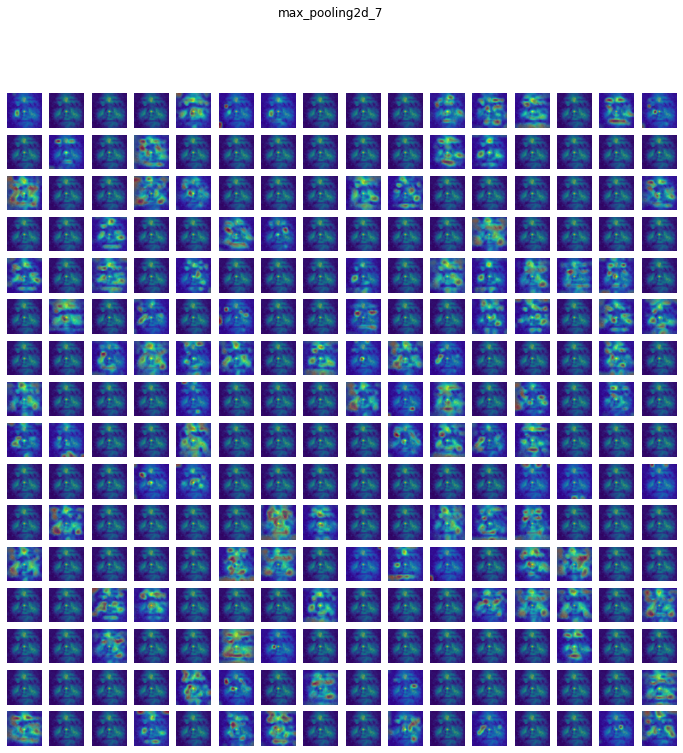

conv2d_17 (1, 12, 12, 1024) 


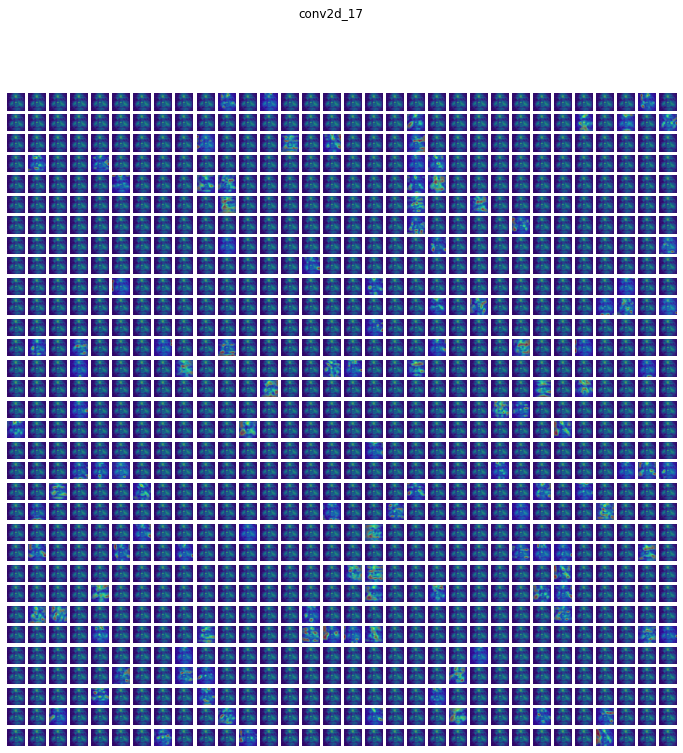

batch_normalization_12 (1, 12, 12, 1024) 


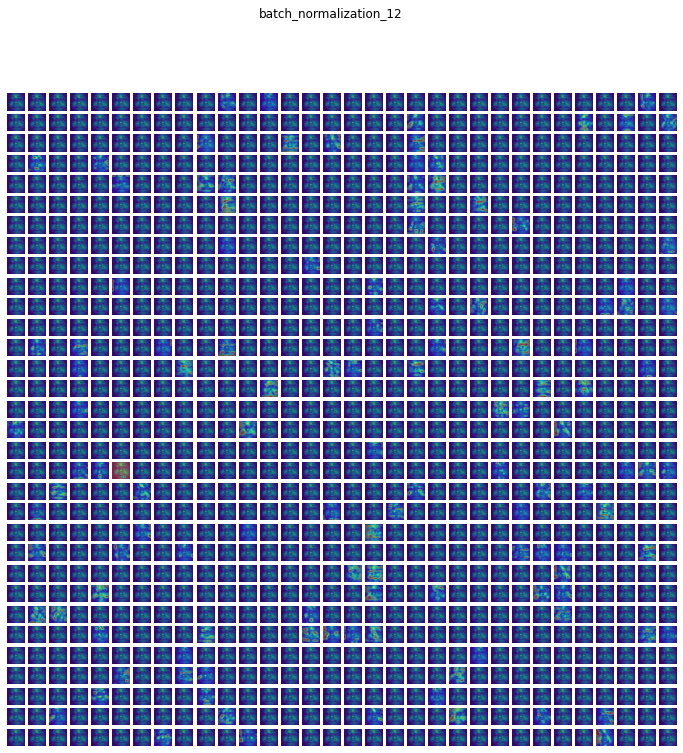

max_pooling2d_8 (1, 6, 6, 1024) 


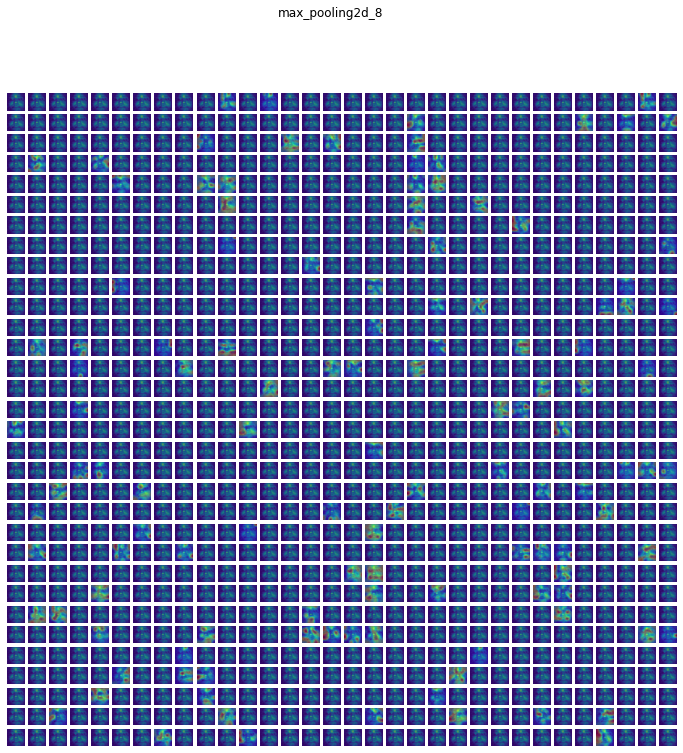

flatten_2 (1, 36864) -> Skipped. 2D Activations.
batch_normalization_13 (1, 36864) -> Skipped. 2D Activations.
dense_12 (1, 999) -> Skipped. 2D Activations.
activation_12 (1, 999) -> Skipped. 2D Activations.
dropout_10 (1, 999) -> Skipped. 2D Activations.
batch_normalization_14 (1, 999) -> Skipped. 2D Activations.
dense_13 (1, 750) -> Skipped. 2D Activations.
activation_13 (1, 750) -> Skipped. 2D Activations.
dropout_11 (1, 750) -> Skipped. 2D Activations.
batch_normalization_15 (1, 750) -> Skipped. 2D Activations.
dense_14 (1, 500) -> Skipped. 2D Activations.
activation_14 (1, 500) -> Skipped. 2D Activations.
dropout_12 (1, 500) -> Skipped. 2D Activations.
batch_normalization_16 (1, 500) -> Skipped. 2D Activations.
dense_15 (1, 100) -> Skipped. 2D Activations.
activation_15 (1, 100) -> Skipped. 2D Activations.
dropout_13 (1, 100) -> Skipped. 2D Activations.
batch_normalization_17 (1, 100) -> Skipped. 2D Activations.
dense_16 (1, 25) -> Skipped. 2D Activations.
activation_16 (1, 25) ->

TypeError: 'NoneType' object is not subscriptable

In [65]:
# activations = get_activations(model,myface.reshape(1,48,48,1))


# display_activations(activations,cmap='gray'),
display_heatmaps(activations,myface.reshape(1,48,48,1),fix=True)[:1]
